In [1]:
import pandas as pd

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import io

In [16]:
# Load the data
df = pd.read_csv('daily_trans_report.csv')

# Convert date column to datetime
df['Date'] = pd.to_datetime(df.iloc[:, 0], format='%d/%m/%Y')

# Rename columns for clarity
column_names = ['Date', 'Transactions', 'Revenue', 'Returns', 'Net_Sales', 'Profit', 'Conversion_Rate']
df.columns = column_names[:len(df.columns)]

# Sort by date
df = df.sort_values('Date')

# Add year and month columns for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate derived metrics
df['Return_Rate'] = df['Returns'] / df['Transactions'] * 100
df['Profit_Margin'] = df['Profit'] / df['Revenue'] * 100

# Analyze trends over time
yearly_metrics = df.groupby('Year').agg({
    'Transactions': 'sum',
    'Revenue': 'sum',
    'Returns': 'sum',
    'Net_Sales': 'sum',
    'Profit': 'sum',
    'Conversion_Rate': 'mean',
    'Return_Rate': 'mean',
    'Profit_Margin': 'mean'
})

# Correlation analysis
correlation_matrix = df[['Transactions', 'Revenue', 'Returns', 'Net_Sales', 'Profit', 'Conversion_Rate']].corr()

# Seasonal patterns
monthly_patterns = df.groupby('Month').agg({
    'Transactions': 'mean',
    'Revenue': 'mean',
    'Conversion_Rate': 'mean'
})

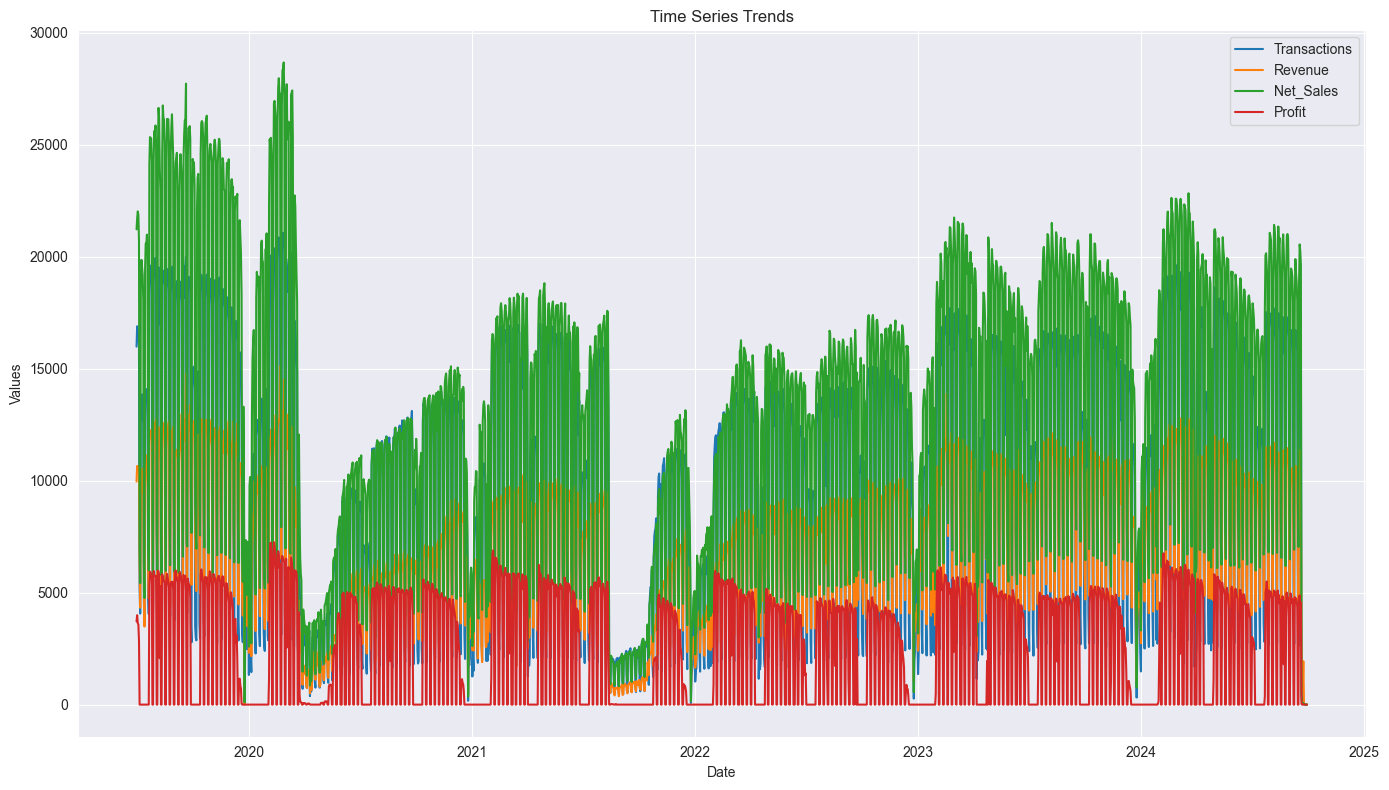

In [17]:
plt.figure(figsize=(14, 8))
for col in ['Transactions', 'Revenue', 'Net_Sales', 'Profit']:
    plt.plot(df['Date'], df[col], label=col)
plt.title('Time Series Trends')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

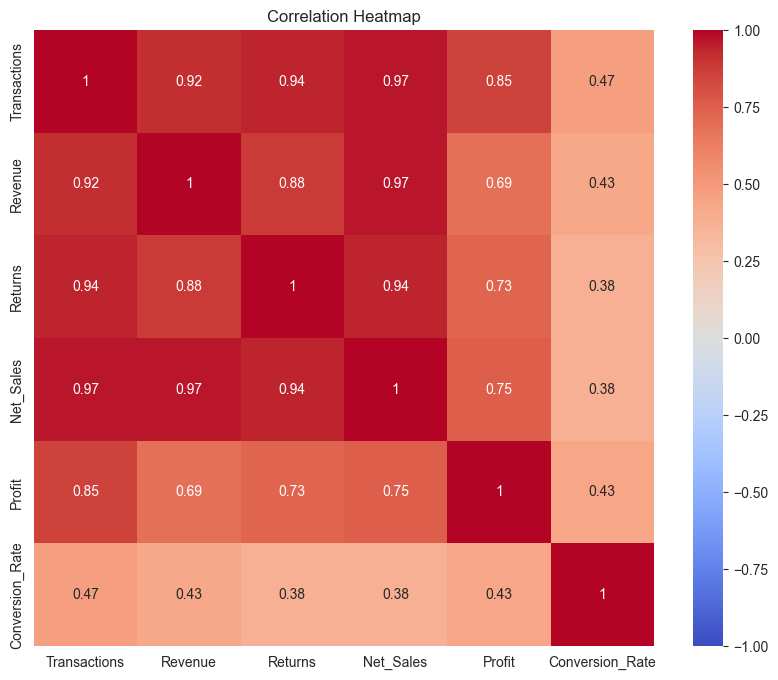

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Transactions', 'Revenue', 'Returns', 'Net_Sales', 'Profit', 'Conversion_Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

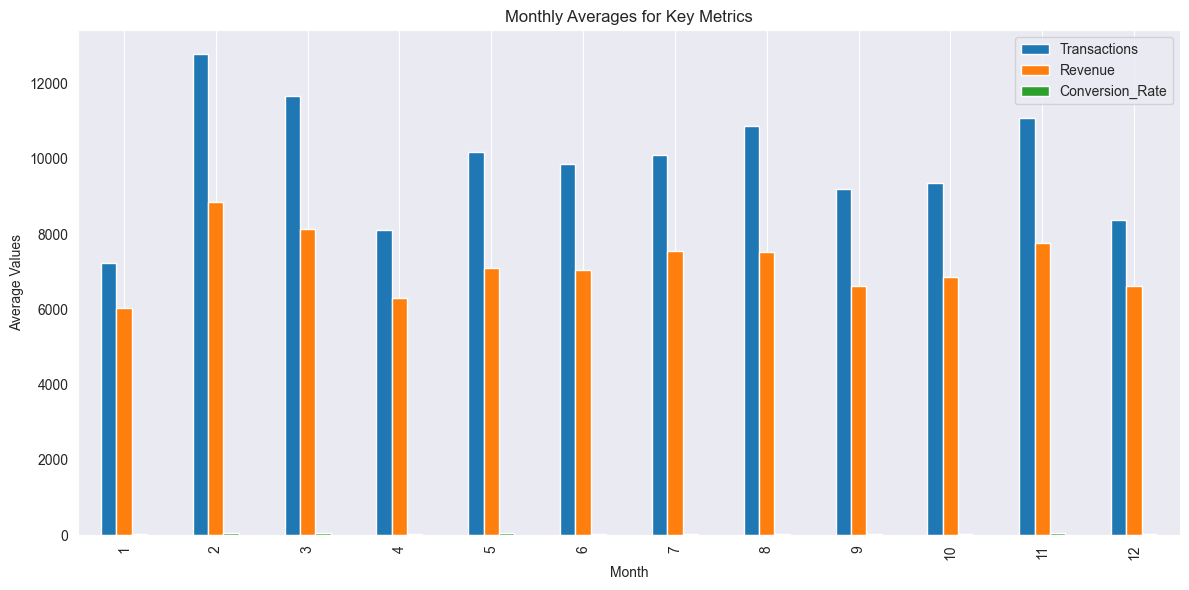

In [20]:
# Seasonal patterns (monthly averages)
monthly_patterns = df.groupby('Month')[['Transactions', 'Revenue', 'Conversion_Rate']].mean()
monthly_patterns.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Averages for Key Metrics')
plt.xlabel('Month')
plt.ylabel('Average Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()